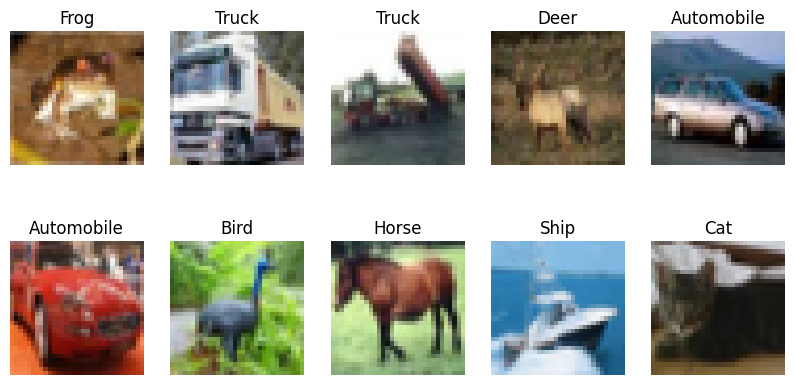

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Display some sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [30]:
# Normalize images to [0,1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

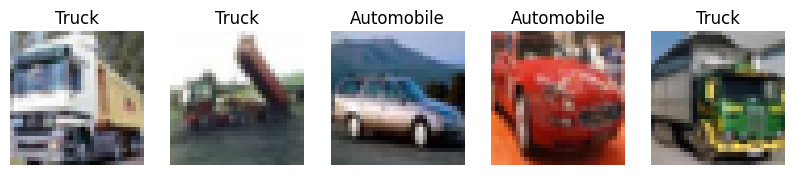

Filtered dataset size - Train: (10000, 32, 32, 3), Test: (2000, 32, 32, 3)


In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

vehicle_classes = [1, 9]

# mask creation for filtering
train_mask = np.isin(y_train, vehicle_classes).flatten()
test_mask = np.isin(y_test, vehicle_classes).flatten()

# Apply masks
x_train_vehicles, y_train_vehicles = x_train[train_mask], y_train[train_mask]
x_test_vehicles, y_test_vehicles = x_test[test_mask], y_test[test_mask]

# Converting labels labels
y_train_vehicles = np.where(y_train_vehicles == 1, 0, 1)
y_test_vehicles = np.where(y_test_vehicles == 1, 0, 1)

# Normalize images to [0,1] range
x_train_vehicles = x_train_vehicles / 255.0
x_test_vehicles = x_test_vehicles / 255.0

# Display some images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(x_train_vehicles[i])
    axes[i].set_title("Automobile" if y_train_vehicles[i] == 0 else "Truck")
    axes[i].axis('off')
plt.show()

print(f"Filtered dataset size - Train: {x_train_vehicles.shape}, Test: {x_test_vehicles.shape}")


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer = Adam(learning_rate=0.001)  # Reduce if needed

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, 
    zoom_range=0.2,
    validation_split=0.2
)
datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Model Architecture
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding = "same" , kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu', padding = "same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu', padding = "same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Additional Layer
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),  # Increased neurons
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,477,450 (9.45 MB)

 Trainable params: 2,475,530 (9.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [33]:
import tensorflow as tf

# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images (optional but recommended)
train_images, test_images = train_images / 255.0, test_images / 255.0


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
#this will stop learning early if there is no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [35]:
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test labels shape: (10000, 1)


In [36]:


# Train Model
history = model.fit(
    train_generator,  # Generator for training
    epochs=50,
    validation_data=train_generator  # Generator for validation
)


# Evaluate Model
model.evaluate(train_generator)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 430s 250ms/step - accuracy: 0.3322 - loss: 2.3777 - val_accuracy: 0.4669 - val_loss: 1.6897
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 266s 170ms/step - accuracy: 0.4913 - loss: 1.6221 - val_accuracy: 0.2937 - val_loss: 2.6217
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 165ms/step - accuracy: 0.5551 - loss: 1.4934 - val_accuracy: 0.5296 - val_loss: 1.5657
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 572s 366ms/step - accuracy: 0.5840 - loss: 1.4234 - val_accuracy: 0.5643 - val_loss: 1.5395
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 548s 350ms/step - accuracy: 0.5927 - loss: 1.4223 - val_accuracy: 0.5895 - val_loss: 1.4353
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 281s 180ms/step - accuracy: 0.6113 - loss: 1.3784 - val_accuracy: 0.6097 - val_loss: 1.3770
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 296s 190ms/step - accuracy: 0.6354 - loss: 1.3211 - val_accuracy: 0.6322 - val_loss: 1.3177
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 489s 313ms/step - ac

[0.9260022640228271, 0.7467399835586548]

In [37]:
history.history['loss']

[2.0352530479431152,
 1.5685925483703613,
 1.4730736017227173,
 1.4267840385437012,
 1.415232539176941,
 1.3921632766723633,
 1.3215444087982178,
 1.2999879121780396,
 1.2816396951675415,
 1.247684121131897,
 1.2110941410064697,
 1.1988922357559204,
 1.170581340789795,
 1.1509872674942017,
 1.1356284618377686,
 1.1282581090927124,
 1.121239185333252,
 1.111407995223999,
 1.098093032836914,
 1.0924642086029053,
 1.0797456502914429,
 1.0760536193847656,
 1.0719009637832642,
 1.0590283870697021,
 1.0593266487121582,
 1.0478514432907104,
 1.0494945049285889,
 1.0439766645431519,
 1.0382823944091797,
 1.0346120595932007,
 1.0367122888565063,
 1.022802710533142,
 1.0310689210891724,
 1.0316200256347656,
 1.026786208152771,
 1.023106575012207,
 1.0127896070480347,
 1.0122264623641968,
 1.0245109796524048,
 1.0097275972366333,
 1.0035877227783203,
 1.006056308746338,
 1.0007400512695312,
 1.0041872262954712,
 1.0014015436172485,
 0.9937567710876465,
 0.9964957237243652,
 0.9999580979347229,
 0

In [38]:
history.history['accuracy']

[0.3903000056743622,
 0.5144000053405762,
 0.5632200241088867,
 0.5867999792098999,
 0.5985999703407288,
 0.6104000210762024,
 0.6333199739456177,
 0.6408399939537048,
 0.648419976234436,
 0.6553400158882141,
 0.6645200252532959,
 0.6708599925041199,
 0.6764799952507019,
 0.682919979095459,
 0.6845800280570984,
 0.6881999969482422,
 0.6895999908447266,
 0.6931399703025818,
 0.6968799829483032,
 0.6954399943351746,
 0.7004600167274475,
 0.7034599781036377,
 0.7041400074958801,
 0.707539975643158,
 0.7081999778747559,
 0.7109599709510803,
 0.7103000283241272,
 0.7127799987792969,
 0.7147600054740906,
 0.7158799767494202,
 0.7158399820327759,
 0.7192599773406982,
 0.7160000205039978,
 0.7140399813652039,
 0.7178400158882141,
 0.7195199728012085,
 0.7222200036048889,
 0.7220600247383118,
 0.7216399908065796,
 0.7249000072479248,
 0.7245200276374817,
 0.7229200005531311,
 0.7243800163269043,
 0.7259399890899658,
 0.7272800207138062,
 0.7294800281524658,
 0.7258399724960327,
 0.7282400131225

In [39]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Model Predictions
y_pred = model.predict(test_images)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_pred_classes))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       0.82      0.96      0.89      1000
           2       0.73      0.72      0.73      1000
           3       0.67      0.58      0.63      1000
           4       0.82      0.71      0.76      1000
           5       0.88      0.53      0.66      1000
           6       0.63      0.91      0.75      1000
           7       0.77      0.87      0.82      1000
           8       0.92      0.84      0.88      1000
           9       0.87      0.86      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

Confusion Matrix:
[[836  27  37   7   7   0   9  20  25  32]
 [  3 963   0   0   0   0   4   0   1  29]
 [ 46   8 720  22  42   7 110  38   4   3]
 [ 28  26  67 584  34  53 143

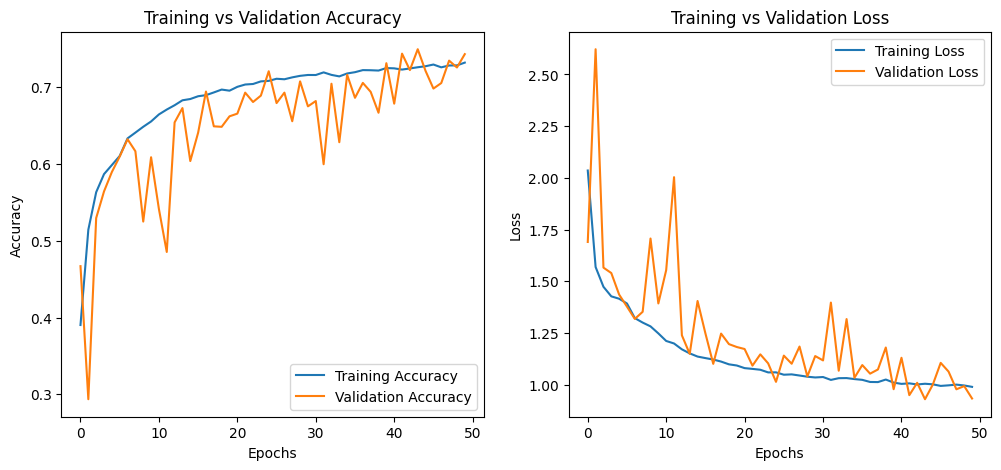

In [40]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


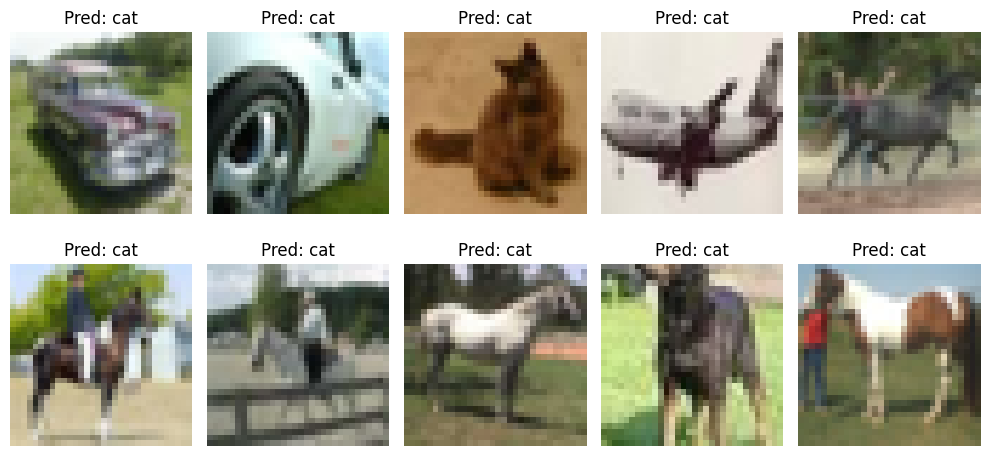

In [41]:
import random

# Get random test images
random_indices = random.sample(range(len(test_images)), 10)
random_images = test_images[random_indices]
random_labels = y_pred[random_indices]

# Plot the images with predictions
plt.figure(figsize=(10, 5))
for i, (img, label) in enumerate(zip(random_images, random_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {class_labels[3]}" )

plt.tight_layout()
plt.show()


In [42]:
model.save('CNN_Image_Classification.h5')

In [43]:
import os
print(os.getcwd())  # This prints the current working directory


C:\WINDOWS\system32
